In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_style("whitegrid")

In [42]:
depeg_data = pd.read_csv("./mim_usdn_wormhole_depeg_reserves_spot_price.csv", parse_dates=[1], index_col=0)
depeg_data.set_index('timestamp', inplace=True)
depeg_data.index = pd.to_datetime(depeg_data.index)
depeg_data

,block,mim_spot_price,wormholeust_spot_price,usdn_spot_price,mim_reserve,mim_3crv_reserve,wormholeust_reserve,wormholeust_3crv_reserve,usdn_reserve,usdn_3crv_reserve
timestamp,,,,,,,,,,
2022-02-15 01:36:33,14207775,0.977352,0.979887,0.969359,1.002967e+09,1.853375e+08,5.409701e+08,5.410248e+08,1.692082e+08,1.014476e+08
2022-02-15 02:18:00,14207938,0.977351,0.979894,0.969359,1.003005e+09,1.853008e+08,5.409700e+08,5.414168e+08,1.692082e+08,1.014476e+08
2022-02-15 02:04:57,14207887,0.977352,0.979894,0.969359,1.002982e+09,1.853234e+08,5.409700e+08,5.414168e+08,1.692082e+08,1.014476e+08
2022-02-15 01:46:49,14207808,0.977352,0.979894,0.969359,1.002977e+09,1.853283e+08,5.409700e+08,5.414168e+08,1.692082e+08,1.014476e+08
2022-02-15 01:15:45,14207698,0.977332,0.979887,0.969359,1.003769e+09,1.845536e+08,5.409701e+08,5.410248e+08,1.692082e+08,1.014476e+08
...,...,...,...,...,...,...,...,...,...,...
2022-05-11 14:38:06,14755162,0.977025,0.394089,0.864446,4.155861e+08,8.473790e+07,3.492392e+08,6.756453e+06,9.587589e+07,6.037569e+06
2022-05-11 16:04:55,14755527,0.977425,0.477399,0.865782,4.043337e+08,9.458706e+07,3.379495e+08,7.873334e+06,9.576098e+07,6.073975e+06
2022-05-11 16:26:27,14755620,0.977652,0.510470,0.922827,3.890532e+08,9.983873e+07,3.368106e+08,8.437010e+06,8.792613e+07,8.450975e+06


In [44]:
usdn_a_100 = depeg_data.loc[depeg_data.index <= pd.Timestamp(2022, 4, 7), ['usdn_reserve', 'usdn_3crv_reserve', 'usdn_spot_price']]
usdn_a_250 = depeg_data.loc[depeg_data.index >= pd.Timestamp(2022, 4, 14), ['usdn_reserve', 'usdn_3crv_reserve', 'usdn_spot_price']]

In [45]:
mim_reserve_ratio = depeg_data.mim_3crv_reserve / depeg_data.mim_reserve
wormholeust_reserve_ratio = depeg_data.wormholeust_3crv_reserve / depeg_data.wormholeust_reserve
usdn_100_reserve_ratio = usdn_a_100.usdn_3crv_reserve / usdn_a_100.usdn_reserve
usdn_250_reserve_ratio = usdn_a_250.usdn_3crv_reserve / usdn_a_250.usdn_reserve


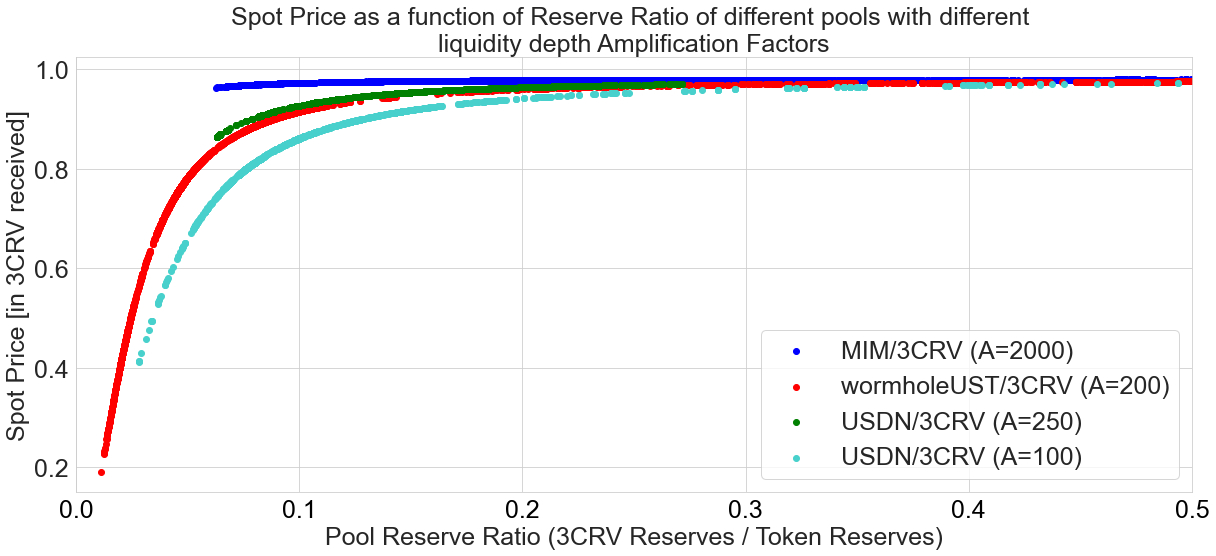

In [47]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

ax.scatter(mim_reserve_ratio, depeg_data.mim_spot_price, c='b', label='MIM/3CRV (A=2000)')
ax.scatter(wormholeust_reserve_ratio, depeg_data.wormholeust_spot_price, c='r', label='wormholeUST/3CRV (A=200)')
ax.scatter(usdn_250_reserve_ratio, usdn_a_250.usdn_spot_price, c='g', label='USDN/3CRV (A=250)')
ax.scatter(usdn_100_reserve_ratio, usdn_a_100.usdn_spot_price, c='mediumturquoise', label='USDN/3CRV (A=100)')

ax.set_xlim([0, 0.5])

ax.set_xlabel("Pool Reserve Ratio (3CRV Reserves / Token Reserves)", fontsize=25)
ax.set_ylabel("Spot Price [in 3CRV received]", fontsize=25)
ax.set_title("Spot Price as a function of Reserve Ratio of different pools with different \nliquidity depth Amplification Factors", fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.tick_params(axis='x', which='major', colors='black')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
ax.legend(fontsize=25)